In [17]:
import pandas as pd
import datetime

df = pd.read_csv('data/cotizaciones.csv')
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         16093 non-null  float64
 1   market_caps    16093 non-null  float64
 2   total_volumes  16093 non-null  float64
 3   id_coin        16093 non-null  object 
 4   date           16093 non-null  object 
dtypes: float64(3), object(2)
memory usage: 628.8+ KB


,prices,market_caps,total_volumes
count,16093.000000,1.609300e+04,1.609300e+04
mean,2874.218713,7.745551e+10,5.789217e+09
std,9024.959534,1.763030e+11,1.186353e+10
min,0.001000,0.000000e+00,6.217976e+01
25%,0.123000,4.180283e+09,2.338205e+08
50%,6.261000,1.235989e+10,1.003451e+09
75%,421.904000,4.509408e+10,4.096546e+09
max,67617.016000,1.278798e+12,1.788941e+11


La ausencia de valores nulos nos hace pensar que los datos han sido obtenidos de una fuente bastante confiable. Si bien los valores mínimos y máximos se alejan mucho de la media, dada la variedad de monedas y conocimiento de algunas de ellas, podemos asumir que son valores correctos.

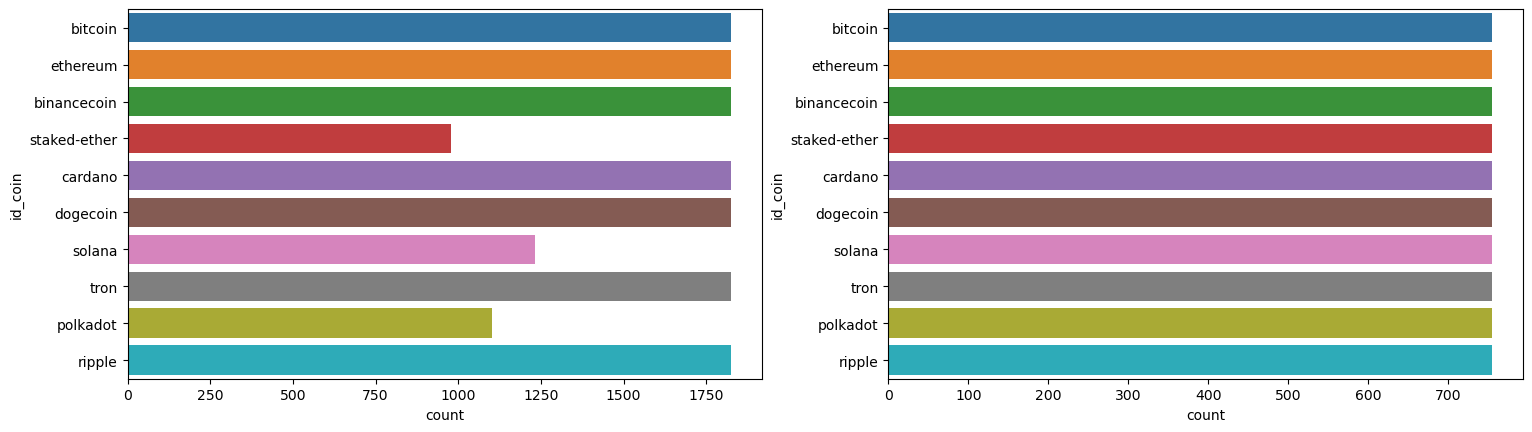

id_coin
binancecoin     1826
bitcoin         1826
cardano         1826
dogecoin        1826
ethereum        1826
ripple          1826
tron            1826
solana          1232
polkadot        1102
staked-ether     977
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot
fig, ax =plt.subplots(1,2)
fig.set_figwidth(18)
sns.countplot(y = df.id_coin, ax=ax[0])
sns.countplot(y = df[df.date>='2021-08-01'].id_coin, ax=ax[1])
plt.show()
df.value_counts('id_coin')


Podemos observar que no hay datos faltantes, si no que algunas monedas fueron creadas después de la fecha que tomamos como inicio para el análisis


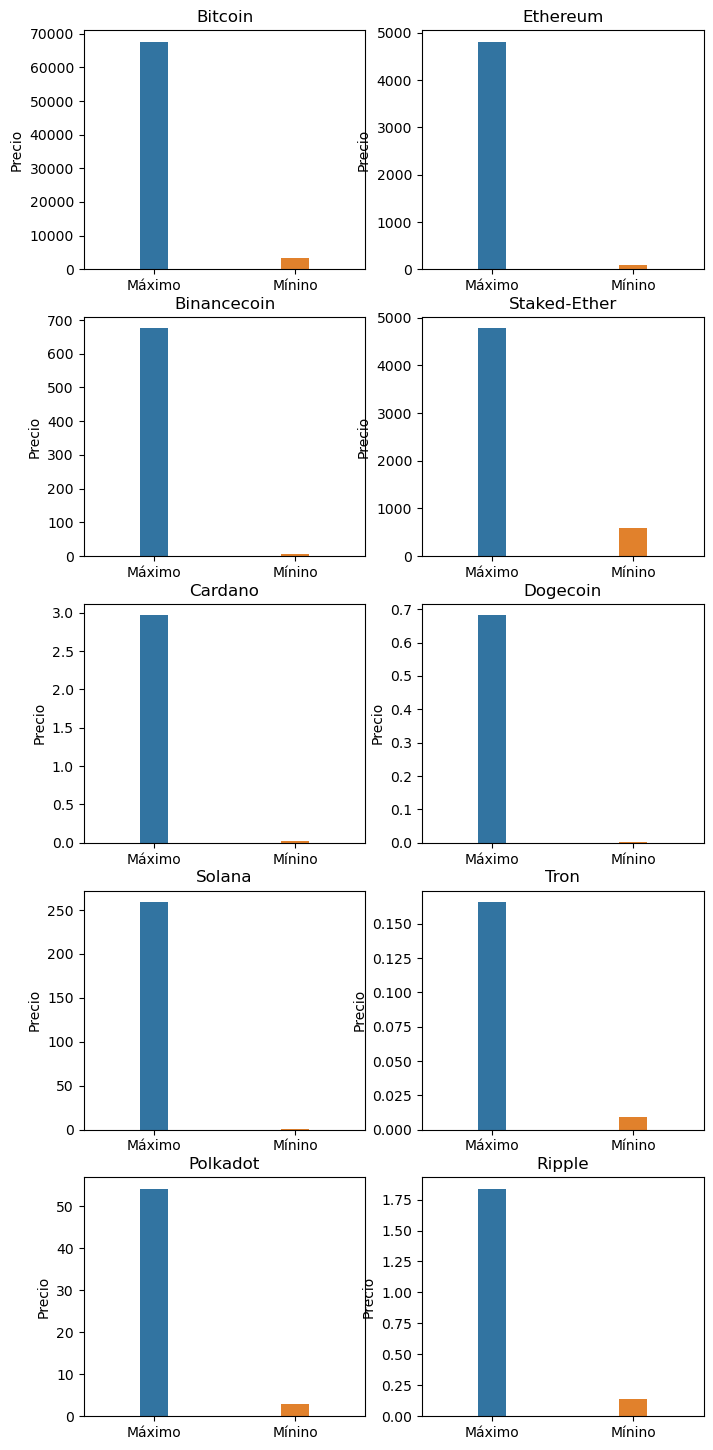

In [19]:
df2 = pd.read_csv('data/monedas.csv')
fig, ax = plt.subplots(5,2)
fig.set_figwidth(8)
fig.set_figheight(18)

i = j = 0
for c in list(df2.id_coin):
    sns.barplot(df2[df2.id_coin==c], ax=ax[j, i], width=0.2).set(title=c.title())

    ax[j, i].set_xticklabels(['Máximo', 'Mínino'])
    ax[j,i].set_ylabel('Precio')
    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()



Podemos observar que los precios máximos y mínimos son muy distantes, lo que nos da una clara idea de la volatilidad de este tipo de activos.

In [20]:
# Agrego fechas faltantes con valor 0 para las monedas que no cubren todo el período
# Para poder graficar mejor

coins_counts = df.value_counts('id_coin').to_dict()
start = df.date.min()
# 5 años 
dias = 365 * 5 + 1

for key, value in coins_counts.items():
    if value<dias:
        faltantes = dias - value + 1 
        rows = [{'prices': 0.0, 'market_caps': 0.0, 'total_volumes': 0.0, 'id_coin': key}]*faltantes
        df_tmp = pd.DataFrame(rows)
        df_tmp['date'] = (pd.date_range(start=start, 
                                     periods=df_tmp.shape[0], 
                                     freq='D'))
        
        df = pd.concat([df_tmp, df], ignore_index=True)


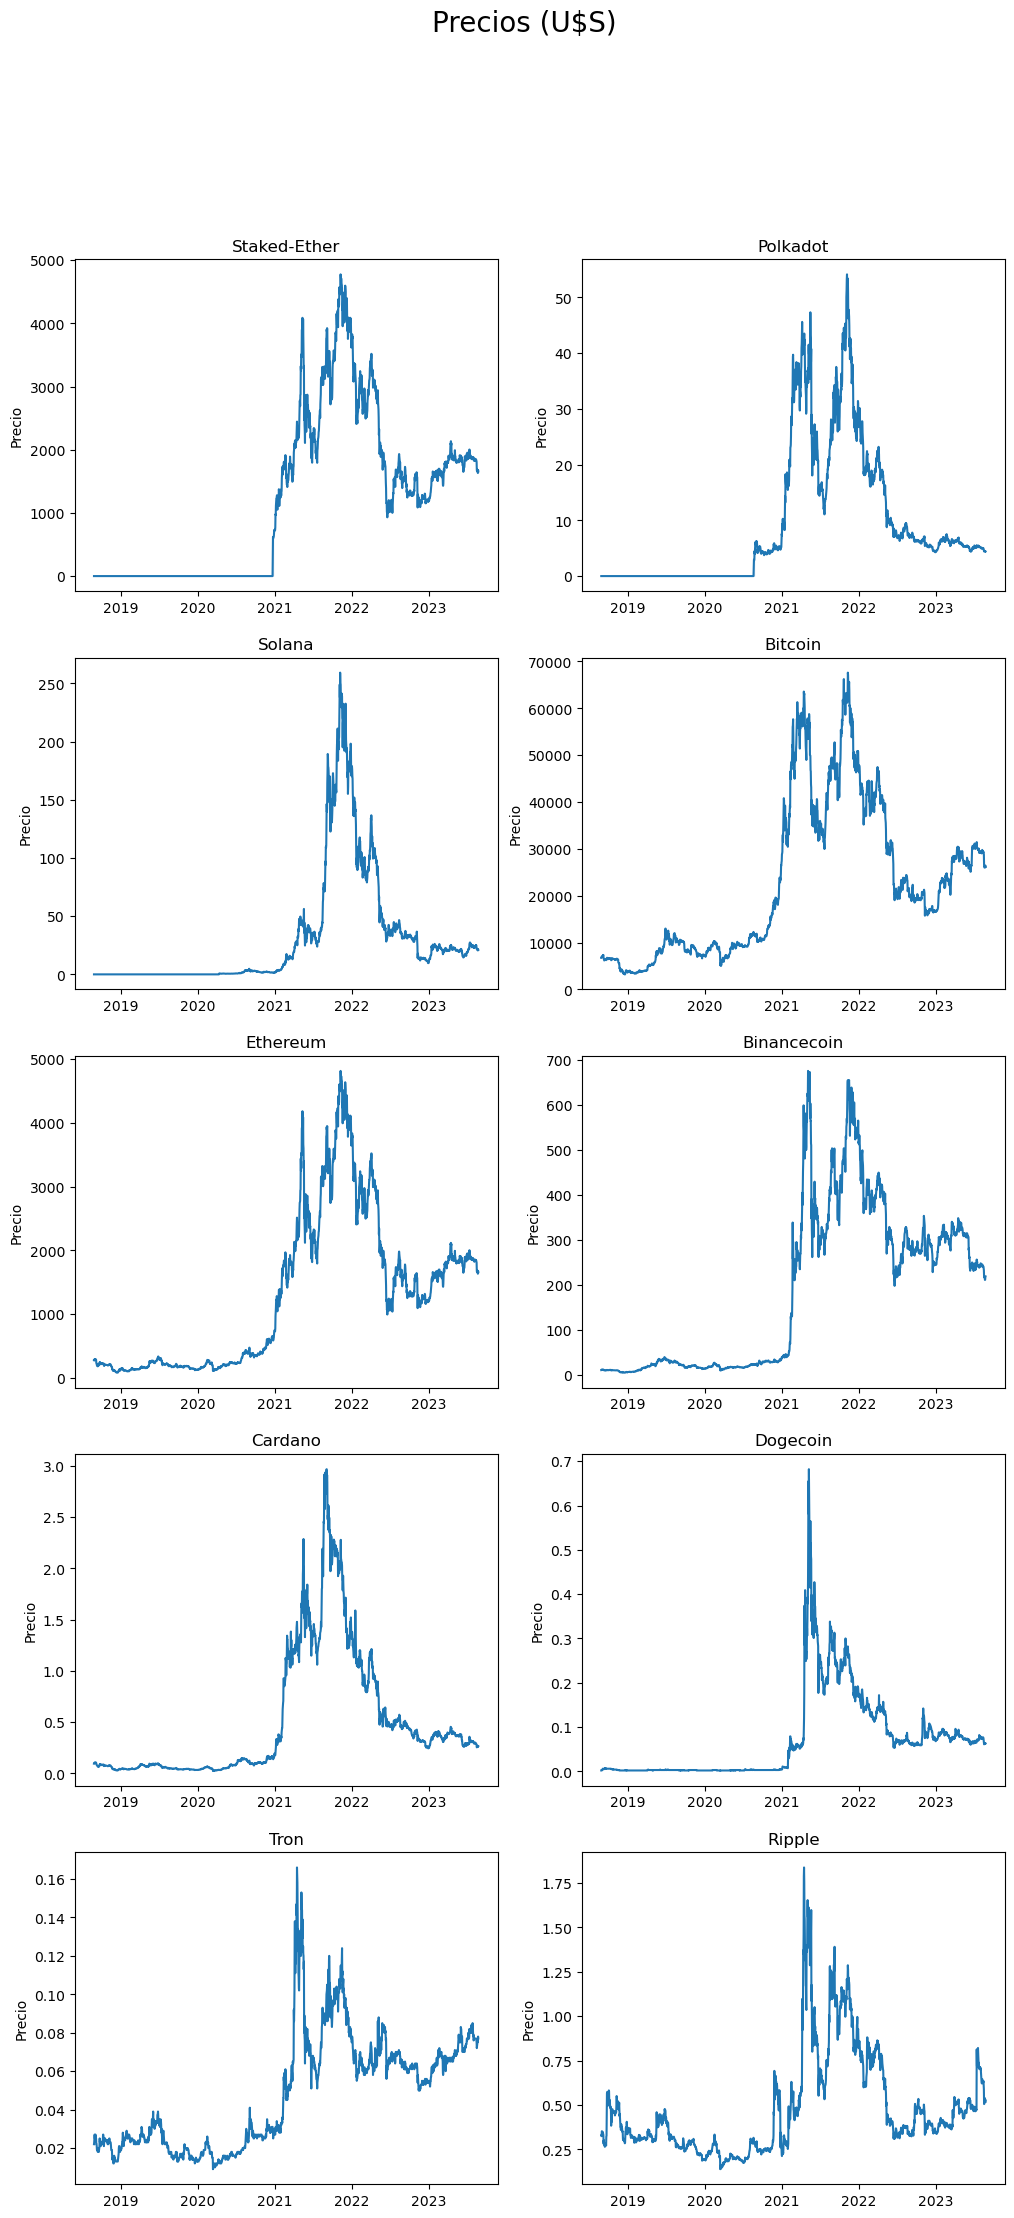

In [21]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(12)
fig.set_figheight(25)
fig.suptitle('Precios (U$S)', fontsize=20)


df['date'] = pd.to_datetime(df['date'])


i = j = 0
coins = list(df.id_coin.unique())
for c in coins:
    sns.lineplot(data=df[df.id_coin==c], x="date", y="prices", ax=ax[j, i]).set(title=c.title())


    ax[j,i].set_xlabel('')
    ax[j,i].set_ylabel('Precio')

    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()



Podemos observar que el precio todas las monedas analizadas tienen un comportamiento similar, con sus valores más altos durante el año 2021 y una abrupta caída a mediados del 2022. Desde mediados de 2022 hasta la fecha, nos encontramos en lo que se denomina el invierno cripto o criptoinvierno, generado principalmente por la quiebra de algunas plataformas de criptomonedas, cuestiones legales y el contexto político y económico internacional.

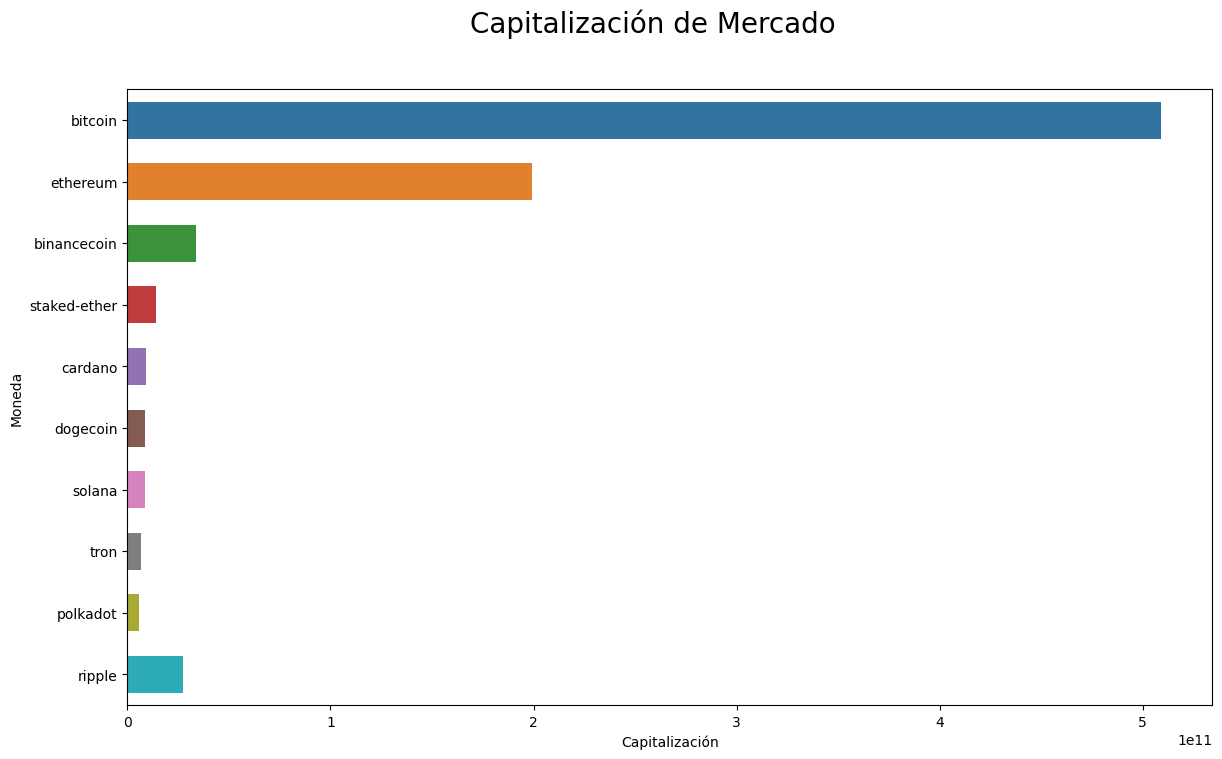

In [22]:
ultima_fecha = df.date.max()
plt.figure(figsize=(14,8))
plt.suptitle('Capitalización de Mercado', fontsize=20)
plt.xlabel('Capitalización')



sns.barplot(df[df['date']==ultima_fecha], x='market_caps', y='id_coin', width=0.6)
plt.xlabel('Capitalización')
plt.ylabel('Moneda')
plt.show()


Podemos observar que Bitcoin, seguida por Ethereum, son las monedas con mayor capitalización, lo que en teoría, supone menor riesgo y mayor nivel liquidez

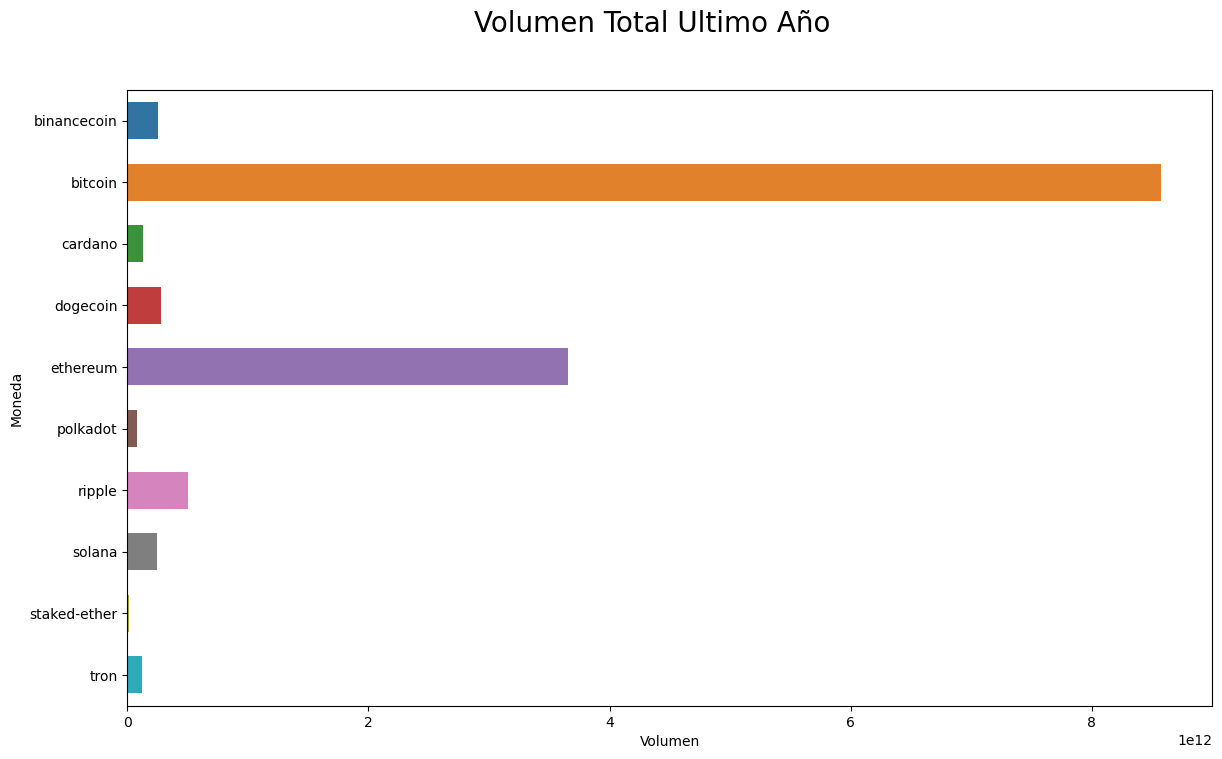

In [23]:
desde = df.date.max() - datetime.timedelta(days=365)
volumenes = df[df.date>=desde].groupby('id_coin')['total_volumes'].sum().reset_index()


plt.figure(figsize=(14,8))
plt.suptitle('Volumen Total Ultimo Año', fontsize=20)

sns.barplot(volumenes, x='total_volumes', y='id_coin', width=0.6)
plt.xlabel('Volumen')
plt.ylabel('Moneda')
plt.show()


Podemos observar que la mayor actividad comercial se da en Bitcoin y Ethereum, luego Ripple y las demás, podría suponer como en la capitalización, una mayor liquidez des estas monedas